# Choosing the number of segments - Elbow chart method

This document shows how to choose the number of segments (optimal $k$) using elbow charts.

## Introducing elbow chart method

**When we should (not) add more clusters**: In clustering analysis, the squared error ($SE$) of a data point is the square of the distance from the point to the centroid of the cluster the point belongs to. $SSE$ (sum of squared errors) is the sum of $SE$'s of all data points. Ideally, the $SSE$ is the lower, the better. Although adding more clusters (a higher $k$) always reduces $SSE$, adding too many clusters can be managerially cumbersome (e.g., when designing individual strategies for each segment) and redundant (e.g., nearby clusters have little differences). Hence, we want to add more clusters if doing so can **significantly** reduce $SSE$, and stop adding clusters if doing so **doesn't reduce $SSE$ by much**.

**How elbow chart works**: The elbow chart plots a curve of how SSE changes with the number of clusters. Because adding more clusters will reduce SSE, the curve will be downward sloping, and the curve is steeper if adding one more cluster ($k \rightarrow k+1$) reduces SSE by a greater amount. We should choose the cluster number $k$ that corresponds to the "elbow point" in the plot (the kink where the curve exhibits an "L" shape). The elbow point indicates that the curve is steeper on the left ($SSE$ decreases a lot from $k-1$ to $k$), and is flatter on the right ($SSE$ decreases not much from $k$ to $k+1$).

**Procedure**: Suppose we want to create no more than $K$ segments. The procedure is as follows:
1. For $k$ from $1$ to $K$, run k-mean algorithm with $k$ clusters, and calculate and record the $SSE$.
2. Plot $SSE$ over the number of segments $k$ to get the elbow chart.
3. Find $k$ that corresponds to the elbow point. This is the optimal number of segments to segment consumers.
4. Use the optimal $k$ to run k-mean algorithm to segment consumers.

We will use "MallCustomersTwoVariables.csv" for analysis.

## Loading data and preprocessing 

This section will generate the normalized dataframe, `df_normalized`, for k-mean algorihm.

In [3]:
# importing packages
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans    # Use "sklearn/cluster/KMeans" for clustering analysis 

# importing data and renaming variables
df = pd.read_csv("C:/Users/zoutianxin/Dropbox/Teach/Marketing analytics/2021/2021 Analytics/clustering/datasets/MallCustomersTwoVariables.csv",index_col=0) # use the first column (customer id) as index
df = df.rename(columns = {"Annual Income (k$)":"annual_income","Spending Score (1-100)":"spending_score"})


# normalizing the data for k-mean algorithm
df_normalized = (df-df.min())/(df.max()-df.min())  # By default, pandas calculate maximums and minimums by columns, which serves our purpose.

## Calculate $SSE$ for each $k$

For exposition, we will create no more than $K = 10$ clusters, and calculate $SSE$s when $k = 1,2,3,...,K$. This can be achieved with a for loop.
<br />
(If you use Windows, you may see a warning of "KMeans is known to have a memory leak...." Don't worry in our case because both our data size and the number of clusters are much smaller than when the problem will happen.)

In [9]:
K = 10  # K is the maximum number of clusters we will check
store_SSE = np.zeros(K)    # create a vector to store SSE's. The k-th entry will be the SSE with k clusters.

for k in range(1, K+1):                                   # try k from 1 to K  
    kmeanSpec = KMeans(n_clusters = k)                        # set up k-mean model with k clusters
    kmean_result = kmeanSpec.fit(df_normalized)               # run k-mean on normalized data
    store_SSE[k-1] = kmeanSpec.inertia_                       # store the SSE (.inertia_) in the k-th entry of store_SSE


store_SSE

C:\software\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


array([23.04072033, 13.99350528,  9.05898522,  6.11031227,  3.58311791,
        3.09870795,  2.6252513 ,  2.21821607,  1.87343467,  1.69238125])

## Generate elbow chart

Text(0.5, 0, 'number of clusters')

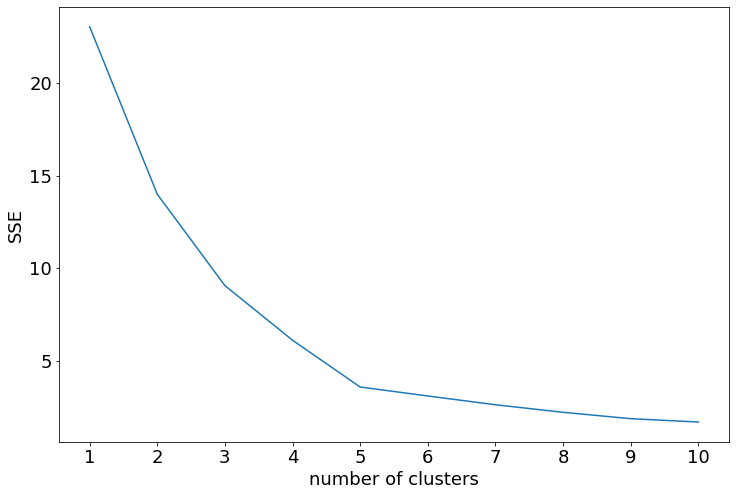

In [14]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [12,8]  # set figure size to be 12*8 inch
plt.plot(range(1, K+1), store_SSE)        
plt.xticks(range(1, K+1), fontsize = 18)
plt.yticks(fontsize = 18)
plt.ylabel("SSE",fontsize = 18)
plt.xlabel("number of clusters", fontsize = 18)


As we can see, the elbow point (kink of "L" shape) appears at $k = 5$, which will be the optimal number of segments to use. 

## Potential Problem of elbow chart methods

- There may be no apparent elbow points or multiple elbow points in the chart
- Choice of elbow points is rather subjective